In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import os

import DataLoader
import network

from train import training
from test import testing
from utils import utils

# NuScenes Exploration

In [6]:
class args():
    def __init__(self, dtype):
#         self.dataset = '/home/yju/JTA/preprocessed_annotations' #folder containing parsed annotations (used when first time loading data)
        self.dataset = '/work/vita/datasets/NuScenes_full/US'
        self.dtype        = dtype
        self.from_file    = True #read dataset from csv file or reprocess data
        self.save         = True
        self.output_path   = '/home/yju/NuScenes'
        self.model_name    = 'model_0.001_512_scheduler.pkl'
        self.loader_workers = 12
        self.loader_shuffle = True
        self.pin_memory     = False
        self.image_resize   = [240, 426]
        self.device         = 'cuda'
        self.batch_size     = 128 # 32, 64
        self.n_epochs       = 100
        self.hidden_size    = 512
        self.hardtanh_limit = 100
        self.input  = 4
        self.output = 4
        self.stride = 8
        self.skip   = 1
        self.task   = 'bounding_box'
        self.use_scenes = False      
        self.lr = 0.00001 # inc lr
        self.filename     = 'nu_{}_{}_{}_{}.csv'.format(str(self.dtype), str(self.input),\
                            str(self.output), str(self.stride)) 
        self.save_path = os.path.join(self.output_path, self.filename)
        self.is_3d     = True

In [7]:
# load data
train = DataLoader.data_loader(args(dtype='train'), data='nuscenes')  
val = DataLoader.data_loader(args(dtype='val'), data='nuscenes') 
test = DataLoader.data_loader(args('test'), data='nuscenes') 

Loading train data ...
cam_token loaded
ann_token loaded
bounding_box loaded
future_bounding_box loaded
K loaded
(13013, 5)
train set loaded
******************************
Loading val data ...
cam_token loaded
ann_token loaded
bounding_box loaded
future_bounding_box loaded
K loaded
(2563, 5)
val set loaded
******************************
Loading test data ...
cam_token loaded
ann_token loaded
bounding_box loaded
future_bounding_box loaded
K loaded
(2556, 5)
test set loaded
******************************


In [4]:
# Make new output path
path = '/home/yju/NuScenes/data'
custom_name = ''
if not os.path.isdir(os.path.join(path, custom_name)):    
    os.mkdir(os.path.join(path, custom_name))
data_path = join(path, custom_name)

## Training

In [14]:
# Train
arg = args(dtype='train')
arg.output_path = data_path
arg.lr = 1e-2
arg.hidden_size = 1024
training(arg, train, val, scheduler=True, save=True)

Training ...
Learning rate: 0.01
Number of epochs: 100
Hidden layer size: 1024

e: 0 | ts: 0.330018 | vs: 0.202549 | ade: 1.5121 | fde: 2.5775 | aiou: 0.1255 | fiou: 0.0399 | t:2.0290
e: 1 | ts: 0.136907 | vs: 0.192242 | ade: 1.4578 | fde: 2.5464 | aiou: 0.1123 | fiou: 0.0331 | t:2.0663
e: 2 | ts: 0.130547 | vs: 0.176269 | ade: 1.3238 | fde: 2.3540 | aiou: 0.1636 | fiou: 0.0578 | t:2.0336
e: 3 | ts: 0.121728 | vs: 0.183465 | ade: 1.4112 | fde: 2.5076 | aiou: 0.1235 | fiou: 0.0205 | t:2.1048
e: 4 | ts: 0.119885 | vs: 0.167465 | ade: 1.3287 | fde: 2.3280 | aiou: 0.1385 | fiou: 0.0491 | t:2.0553
e: 5 | ts: 0.117337 | vs: 0.169449 | ade: 1.3022 | fde: 2.3164 | aiou: 0.1768 | fiou: 0.0670 | t:2.0248
e: 6 | ts: 0.115180 | vs: 0.176647 | ade: 1.3437 | fde: 2.3937 | aiou: 0.1510 | fiou: 0.0455 | t:2.0824
e: 7 | ts: 0.113233 | vs: 0.174213 | ade: 1.3712 | fde: 2.4336 | aiou: 0.1517 | fiou: 0.0346 | t:2.0402
e: 8 | ts: 0.111080 | vs: 0.160876 | ade: 1.2507 | fde: 2.2226 | aiou: 0.1812 | fiou: 0.

e: 74 | ts: 0.050373 | vs: 0.180451 | ade: 1.2505 | fde: 2.2541 | aiou: 0.2047 | fiou: 0.0841 | t:2.0681
e: 75 | ts: 0.050333 | vs: 0.180565 | ade: 1.2504 | fde: 2.2538 | aiou: 0.2048 | fiou: 0.0842 | t:2.0527
e: 76 | ts: 0.050078 | vs: 0.180684 | ade: 1.2516 | fde: 2.2561 | aiou: 0.2045 | fiou: 0.0840 | t:2.0571
e: 77 | ts: 0.049946 | vs: 0.180624 | ade: 1.2510 | fde: 2.2551 | aiou: 0.2047 | fiou: 0.0842 | t:2.0377
e: 78 | ts: 0.050431 | vs: 0.180656 | ade: 1.2512 | fde: 2.2555 | aiou: 0.2045 | fiou: 0.0839 | t:2.0061
Epoch    80: reducing learning rate of group 0 to 1.0000e-08.
e: 79 | ts: 0.050230 | vs: 0.180675 | ade: 1.2512 | fde: 2.2555 | aiou: 0.2047 | fiou: 0.0842 | t:2.0777
e: 80 | ts: 0.049998 | vs: 0.180609 | ade: 1.2509 | fde: 2.2550 | aiou: 0.2047 | fiou: 0.0841 | t:2.0372
e: 81 | ts: 0.050313 | vs: 0.180509 | ade: 1.2503 | fde: 2.2537 | aiou: 0.2047 | fiou: 0.0842 | t:2.0368
e: 82 | ts: 0.050306 | vs: 0.180606 | ade: 1.2507 | fde: 2.2544 | aiou: 0.2047 | fiou: 0.0842 | t:

In [16]:
arg = args(dtype='train')
arg.output_path = data_path
arg.lr = 1e-5
arg.hidden_size = 1024
training(arg, train, val, scheduler=False, save=True)

Training ...
Learning rate: 1e-05
Number of epochs: 100
Hidden layer size: 1024

e: 0 | ts: 0.879902 | vs: 1.114415 | ade: 5.0969 | fde: 8.1596 | aiou: 0.0307 | fiou: 0.0124 | t:2.1184
e: 1 | ts: 0.700812 | vs: 0.787134 | ade: 4.3809 | fde: 6.9393 | aiou: 0.0128 | fiou: 0.0015 | t:2.0295
e: 2 | ts: 0.418542 | vs: 0.408041 | ade: 2.8844 | fde: 4.3196 | aiou: 0.0226 | fiou: 0.0045 | t:2.0274
e: 3 | ts: 0.264605 | vs: 0.314628 | ade: 2.3036 | fde: 3.5014 | aiou: 0.0336 | fiou: 0.0108 | t:2.0621
e: 4 | ts: 0.216045 | vs: 0.278058 | ade: 2.0354 | fde: 3.2201 | aiou: 0.0454 | fiou: 0.0131 | t:2.0087
e: 5 | ts: 0.197903 | vs: 0.263715 | ade: 1.9066 | fde: 3.0876 | aiou: 0.0551 | fiou: 0.0163 | t:2.0736
e: 6 | ts: 0.188514 | vs: 0.255773 | ade: 1.8308 | fde: 3.0220 | aiou: 0.0745 | fiou: 0.0261 | t:2.0272
e: 7 | ts: 0.181592 | vs: 0.252107 | ade: 1.7991 | fde: 2.9994 | aiou: 0.0787 | fiou: 0.0248 | t:2.4698
e: 8 | ts: 0.178015 | vs: 0.246313 | ade: 1.7637 | fde: 2.9666 | aiou: 0.0891 | fiou: 0

e: 77 | ts: 0.118289 | vs: 0.165658 | ade: 1.2913 | fde: 2.3164 | aiou: 0.1673 | fiou: 0.0486 | t:2.1608
e: 78 | ts: 0.118076 | vs: 0.164221 | ade: 1.2778 | fde: 2.2956 | aiou: 0.1748 | fiou: 0.0528 | t:2.1051
e: 79 | ts: 0.117673 | vs: 0.164274 | ade: 1.2683 | fde: 2.2787 | aiou: 0.1775 | fiou: 0.0606 | t:2.1210
e: 80 | ts: 0.117708 | vs: 0.163933 | ade: 1.2635 | fde: 2.2711 | aiou: 0.1871 | fiou: 0.0681 | t:2.1347
e: 81 | ts: 0.118048 | vs: 0.163318 | ade: 1.2611 | fde: 2.2641 | aiou: 0.1807 | fiou: 0.0619 | t:2.1392
e: 82 | ts: 0.116733 | vs: 0.166424 | ade: 1.3062 | fde: 2.3406 | aiou: 0.1569 | fiou: 0.0395 | t:2.1890
e: 83 | ts: 0.116810 | vs: 0.162922 | ade: 1.2608 | fde: 2.2683 | aiou: 0.1869 | fiou: 0.0696 | t:2.0973
e: 84 | ts: 0.116940 | vs: 0.163517 | ade: 1.2642 | fde: 2.2718 | aiou: 0.1776 | fiou: 0.0555 | t:2.1343
e: 85 | ts: 0.116549 | vs: 0.162224 | ade: 1.2788 | fde: 2.2962 | aiou: 0.1684 | fiou: 0.0490 | t:2.0599
e: 86 | ts: 0.116571 | vs: 0.162210 | ade: 1.2607 | fde

## Testing

In [5]:
arg = args(dtype='train')
arg.output_path = data_path
arg.hidden_size = 512
arg.model_name = 'model_0.001_512_scheduler.pkl'
preds_train = testing(arg, train)

Testing ...
vs: 0.1248518 | ade: 0.7782 | fde: 1.3444 | aiou: 0.2692 | fiou: 0.1180 | t:1.2260


In [6]:
arg.dtype = 'val'
preds_val = testing(arg, val)

Testing ...
vs: 0.3612196 | ade: 1.2505 | fde: 2.2545 | aiou: 0.2048 | fiou: 0.0842 | t:0.6816


In [7]:
arg.dtype = 'test'
preds_test = testing(arg, test)

Testing ...
vs: 0.2797019 | ade: 1.0278 | fde: 1.8533 | aiou: 0.2788 | fiou: 0.1407 | t:0.6966


In [8]:
# Get ground truth
df_train = train.dataset.data
df_val = val.dataset.data
df_test = test.dataset.data

pred_test = []
pred_train = []
pred_val = []

size = 15

for i in range(size):
    pred_test.extend(preds_test[i].cpu().detach().numpy())
    pred_train.extend(preds_train[i].cpu().detach().numpy())
    pred_val.extend(preds_val[i].cpu().detach().numpy())

pred_test = np.asarray(pred_test)
pred_train = np.asarray(pred_train)
pred_val = np.asarray(pred_val)

print(pred_test.shape) # gives first 128 predictions, each of length 16 frames with 6 variables each
print(pred_train.shape)
print(pred_val.shape)

(1920, 4, 6)
(1920, 4, 6)
(1920, 4, 6)


## Visualization

In [9]:
# Need to have access to nuscenes-devkit/python-sdk folder
from IPython.display import Image as display_gif
from visualization.visualize import visualize

In [10]:
vis = visualize('nuscenes')

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 37.730 seconds.
Reverse indexing ...
Done reverse indexing in 10.2 seconds.


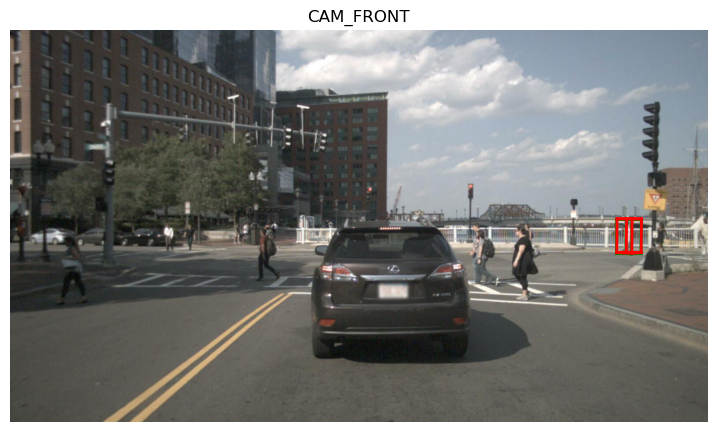

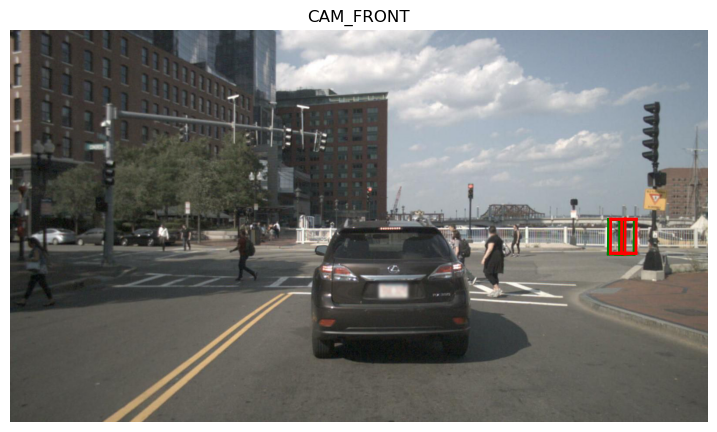

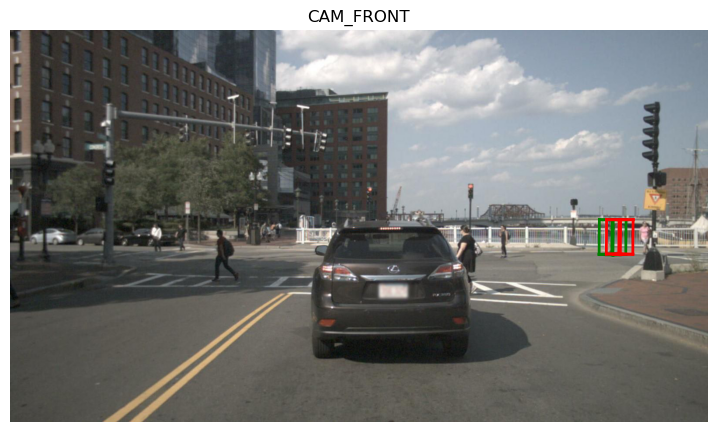

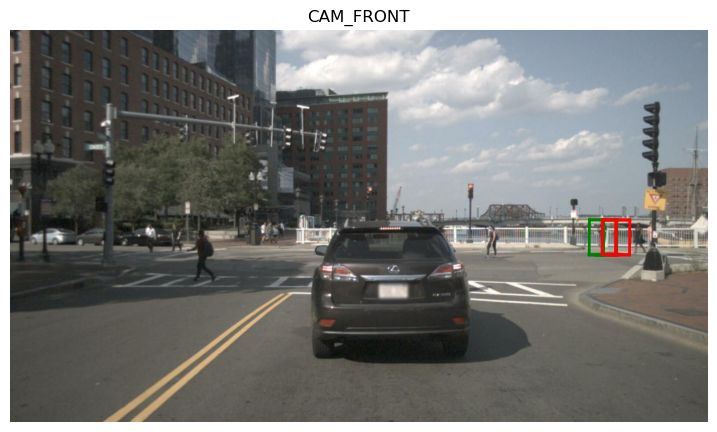

<Figure size 432x288 with 0 Axes>

In [11]:
idx = 1228
save= False
outpath = '/home/yju/yju_testing/3d-bbox/gifs'
vis.get_gif(idx, df_test, pred_test, args('test'), outpath, save=save)

## Show GIFs

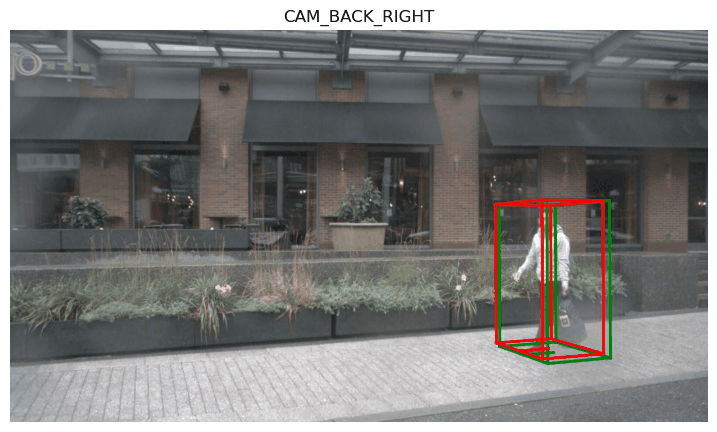

In [39]:
display_gif(join(outpath,"test_scene-0595_frame0_idx63.gif")) 

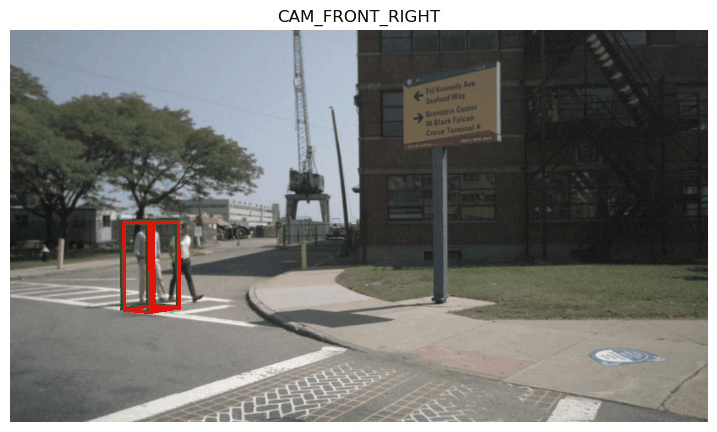

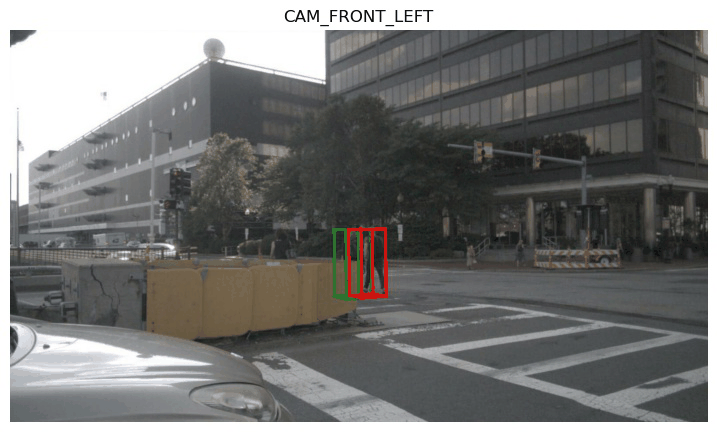

In [70]:
display_gif(join(outpath,"test_scene-0716_frame0_idx1102.gif")) 

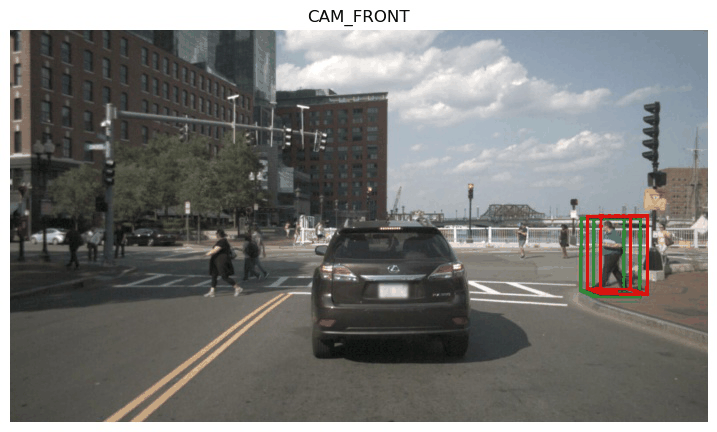

In [91]:
display_gif(join(outpath,"test_scene-0718_frame0_idx1233.gif")) 

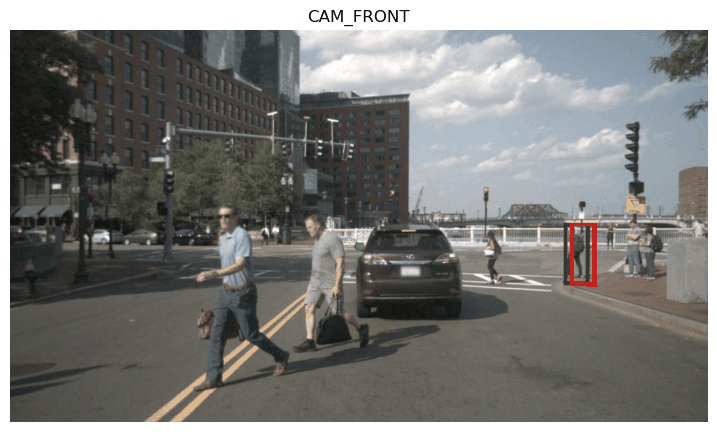

In [101]:
display_gif(join(outpath,"test_scene-0717_frame0_idx1208.gif")) 